In [81]:
from openbb_terminal.sdk import openbb
import pandas as pd
import numpy as np

from datetime import date, timedelta, datetime
from dateutil.relativedelta import relativedelta

%matplotlib inline

In [82]:
start = (date.today() - relativedelta(months=12)).strftime('%Y-%m-%d')
end = (date.today() + timedelta(days=1)).strftime('%Y-%m-%d')

# Indicies df

In [83]:
data_indicies = openbb.economy.indices()
data_indicies[["Chg", "%Chg"]] = data_indicies[["Chg", "%Chg"]].apply(pd.to_numeric)
data_indicies = data_indicies.set_index(data_indicies.columns[0])
data_indicies

Price     Chg  %Chg
                                             
DJIA                   33665.02   91.74  0.27
Nasdaq Composite       13104.89 -171.52 -1.29
S&P 500                 4267.52  -16.33 -0.38
DJ Total Stock Market  42715.66  -96.76 -0.23
Russell 2000            1888.45   33.05  1.78
NYSE Composite         15469.63   77.83  0.51
Barron's 400             958.16   13.51  1.43
CBOE Volatility           13.94   -0.02 -0.14
DJIA Futures              33697  -12.00 -0.04
S&P 500 Futures         4273.75   -0.50 -0.01

In [84]:
def highlight_max(cell):
    if type(cell) != str and cell < 0 :
        return 'background: red; color:black'
    else:
        return 'background: green; color: white'
  
data_indicies.style.applymap(highlight_max, subset=["Chg", "%Chg"])

In [4]:
# Dropdown to select chart for each index, would like this to the right of the heatmap in app

In [85]:
plot_onedf = openbb.economy.index(indices= ["dow_dji", "nasdaq", "sp500", "dow_djus", "russell2000", "nyse", "sp400", "cboe_vix"],
    interval = "1d",
    start_date = start,
    end_date = end,
    column = "Close",
    #returns: bool = False,
                    
)

plot_onedf

dow_dji        nasdaq        sp500     dow_djus  russell2000  \
Date                                                                            
2022-06-07  33180.140625  12175.230469  4160.680176  1020.039978  1919.560059   
2022-06-08  32910.898438  12086.269531  4115.770020  1008.909973  1891.010010   
2022-06-09  32272.789062  11754.230469  4017.820068   984.559998  1850.859985   
2022-06-10  31392.789062  11340.019531  3900.860107   955.380005  1800.280029   
2022-06-13  30516.740234  10809.230469  3749.629883   916.690002  1714.589966   
...                  ...           ...          ...          ...          ...   
2023-06-01  33061.570312  13100.980469  4221.020020  1027.890015  1767.939941   
2023-06-02  33762.761719  13240.769531  4282.370117  1044.060059  1830.910034   
2023-06-05  33562.859375  13229.429688  4273.790039  1041.689941  1806.709961   
2023-06-06  33573.281250  13276.419922  4283.850098  1045.329956  1855.400024   
2023-06-07  33665.019531  13104.894531  4267.520020  1041.859985  1888.447144   

                    nyse        sp400   cboe_vix  
Date                                              
2022-06-07  16019.559570  2567.719971  24.020000  
2022-06-08  15843.830078  2520.610107  23.959999  
2022-06-09  15472.459961  2468.570068  26.090000  
2022-06-10  15096.690430  2403.070068  27.750000  
2022-06-13  14527.900391  2294.080078  34.020000  
...                  ...          ...        ...  
2023-06-01  15031.089844  2426.250000  15.650000  
2023-06-02  15345.190430  2505.550049  14.600000  
2023-06-05  15275.209961  2479.300049  14.730000  
2023-06-06  15391.799805  2530.239990  13.960000  
2023-06-07  15469.632812  2568.610107  13.940000  

[252 rows x 8 columns]

In [86]:
sp_futs = openbb.futures.historical(symbols = "ES", start_date = start, end_date = end)
sp_futs = sp_futs.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
dow_futs = openbb.futures.historical(symbols = "YM", start_date = start, end_date = end)
dow_futs = dow_futs.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])

In [87]:
indicies_plot_df = pd.concat([plot_onedf, dow_futs, sp_futs], axis=1)
indicies_plot_df.columns = ["DJIA", "Nasdaq Composite", "S&P 500", "DJ Total Stock Market", "Russell 2000",
                            "NYSE Composite", "Barron's 400", "CBOE Volatility", "DJIA Futures", "S&P 500 Futures"
                           
]
indicies_plot_df

DJIA  Nasdaq Composite      S&P 500  \
Date                                                      
2022-06-07  33180.140625      12175.230469  4160.680176   
2022-06-08  32910.898438      12086.269531  4115.770020   
2022-06-09  32272.789062      11754.230469  4017.820068   
2022-06-10  31392.789062      11340.019531  3900.860107   
2022-06-13  30516.740234      10809.230469  3749.629883   
...                  ...               ...          ...   
2023-06-01  33061.570312      13100.980469  4221.020020   
2023-06-02  33762.761719      13240.769531  4282.370117   
2023-06-05  33562.859375      13229.429688  4273.790039   
2023-06-06  33573.281250      13276.419922  4283.850098   
2023-06-07  33665.019531      13104.894531  4267.520020   

            DJ Total Stock Market  Russell 2000  NYSE Composite  Barron's 400  \
Date                                                                            
2022-06-07            1020.039978   1919.560059    16019.559570   2567.719971   
2022-06-08            1008.909973   1891.010010    15843.830078   2520.610107   
2022-06-09             984.559998   1850.859985    15472.459961   2468.570068   
2022-06-10             955.380005   1800.280029    15096.690430   2403.070068   
2022-06-13             916.690002   1714.589966    14527.900391   2294.080078   
...                           ...           ...             ...           ...   
2023-06-01            1027.890015   1767.939941    15031.089844   2426.250000   
2023-06-02            1044.060059   1830.910034    15345.190430   2505.550049   
2023-06-05            1041.689941   1806.709961    15275.209961   2479.300049   
2023-06-06            1045.329956   1855.400024    15391.799805   2530.239990   
2023-06-07            1041.859985   1888.447144    15469.632812   2568.610107   

            CBOE Volatility  DJIA Futures  S&P 500 Futures  
Date                                                        
2022-06-07        24.020000       33165.0          4158.75  
2022-06-08        23.959999       32889.0          4114.00  
2022-06-09        26.090000       32263.0          4016.25  
2022-06-10        27.750000       31388.0          3899.00  
2022-06-13        34.020000       30527.0          3750.50  
...                     ...           ...              ...  
2023-06-01        15.650000       33103.0          4228.00  
2023-06-02        14.600000       33817.0          4288.00  
2023-06-05        14.730000       33619.0          4281.00  
2023-06-06        13.960000       33617.0          4289.75  
2023-06-07        13.940000       33696.0          4273.50  

[254 rows x 10 columns]

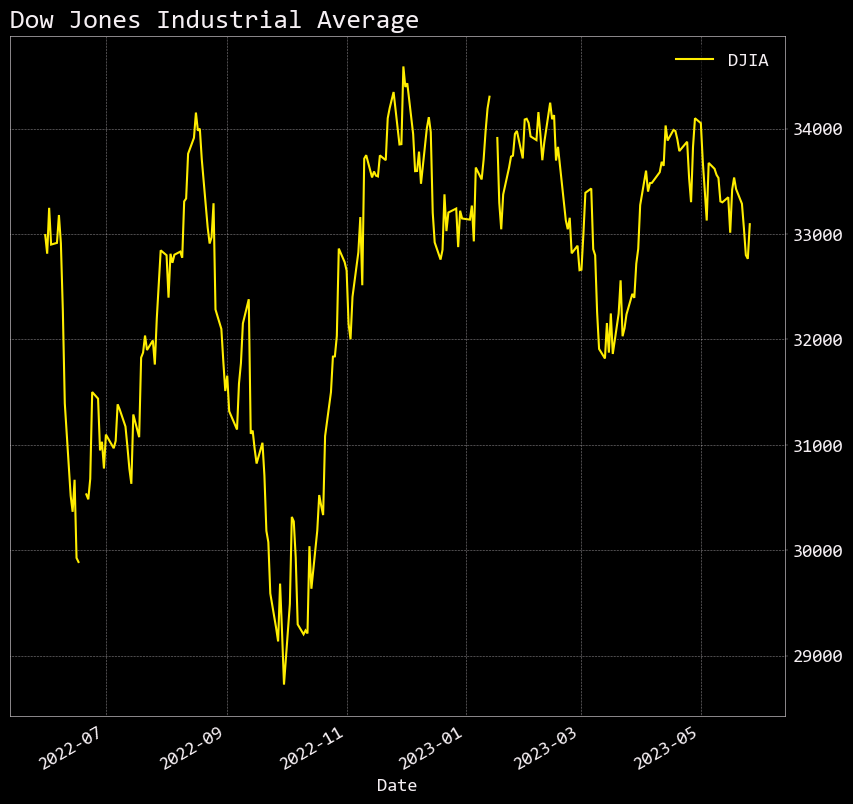

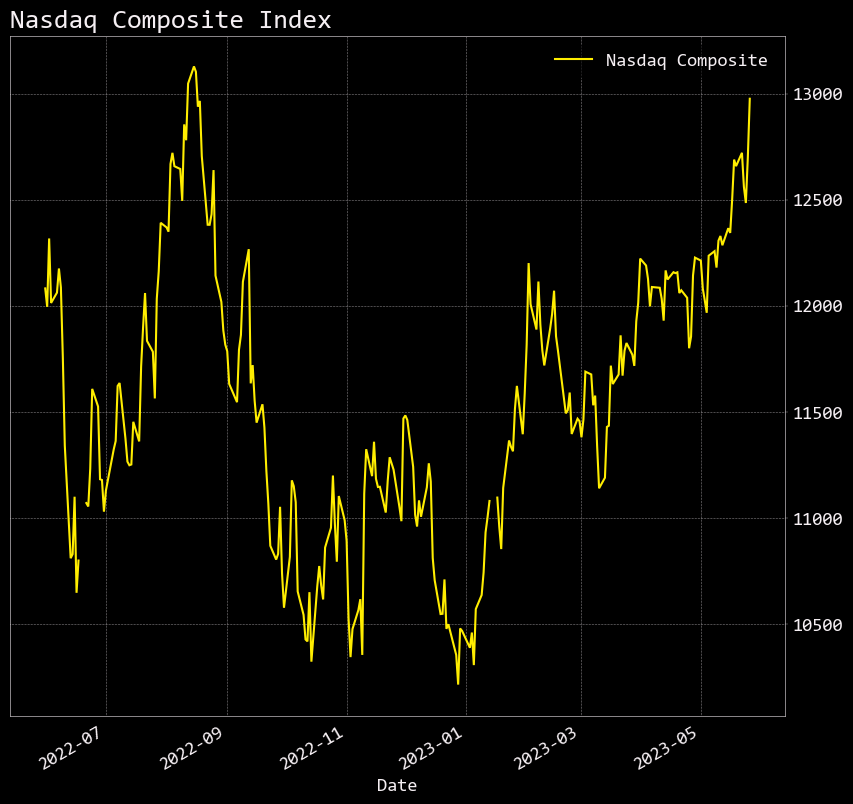

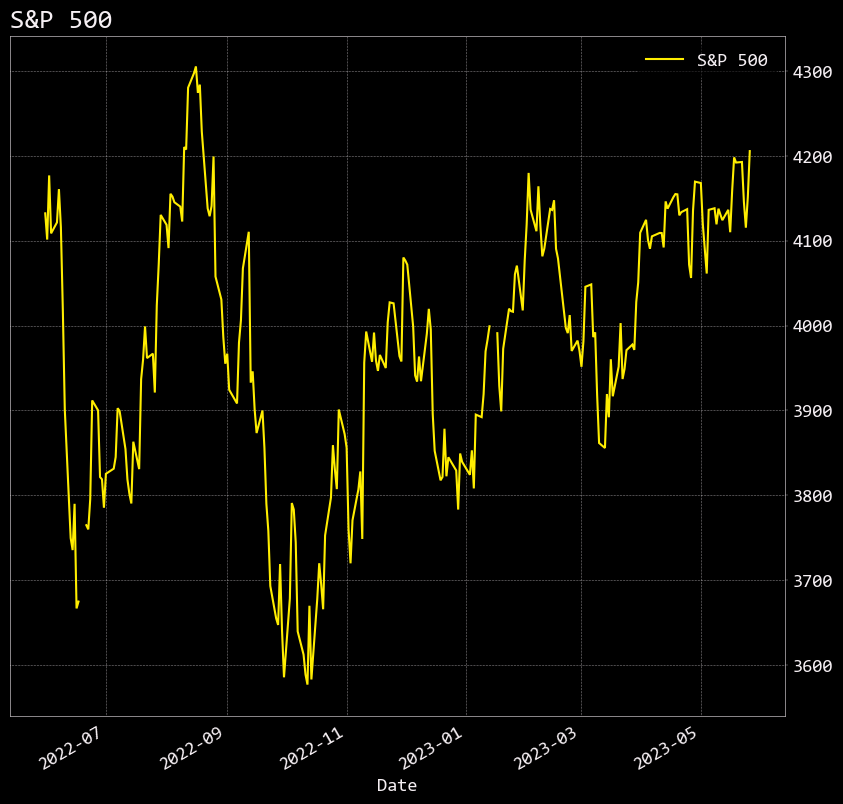

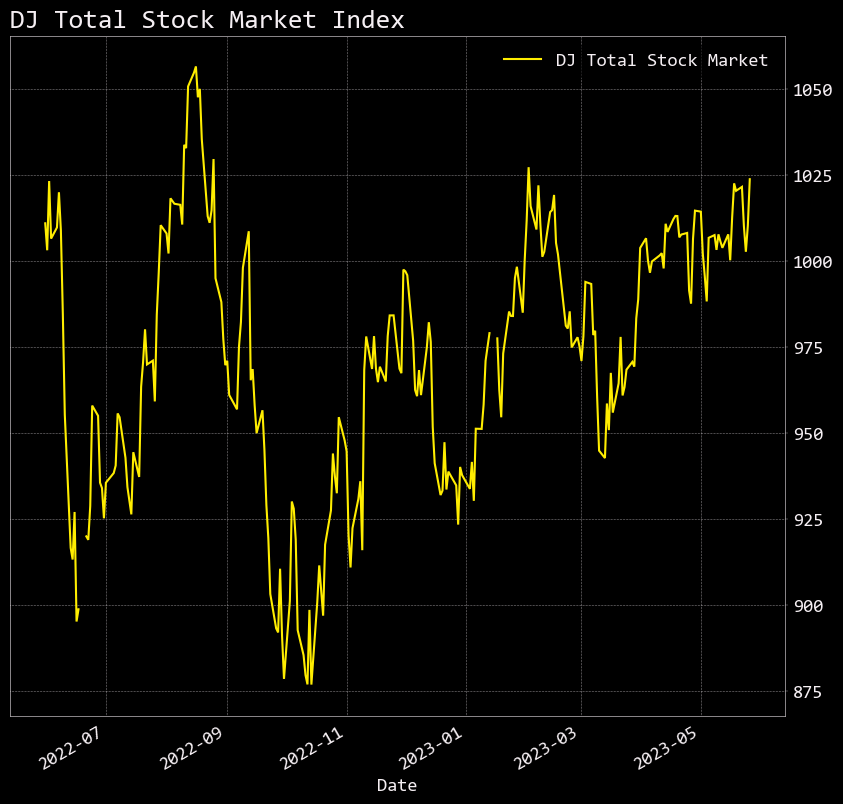

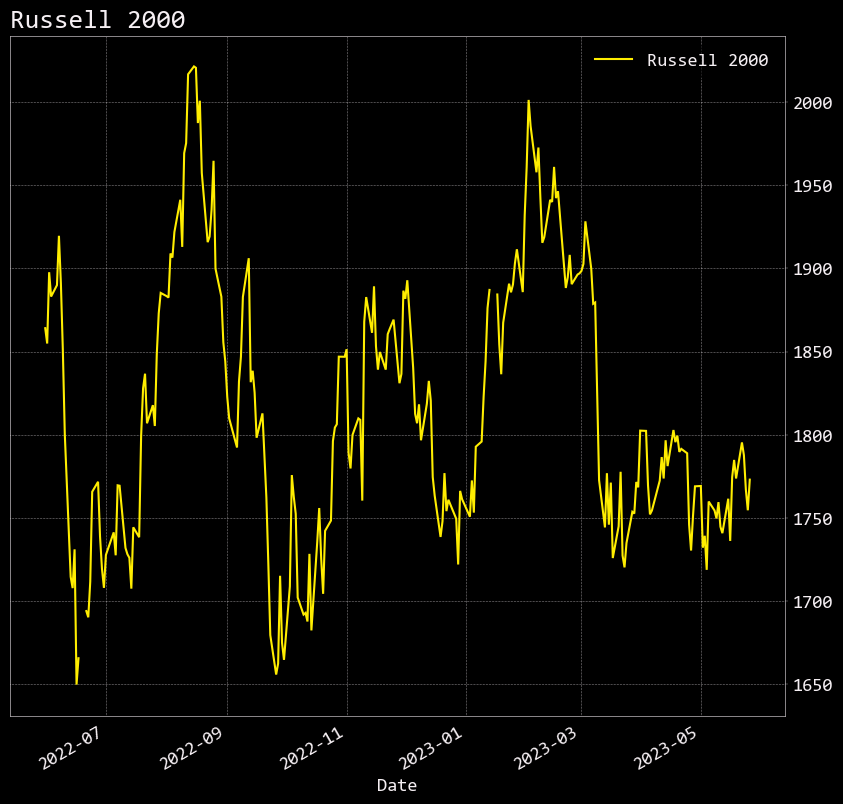

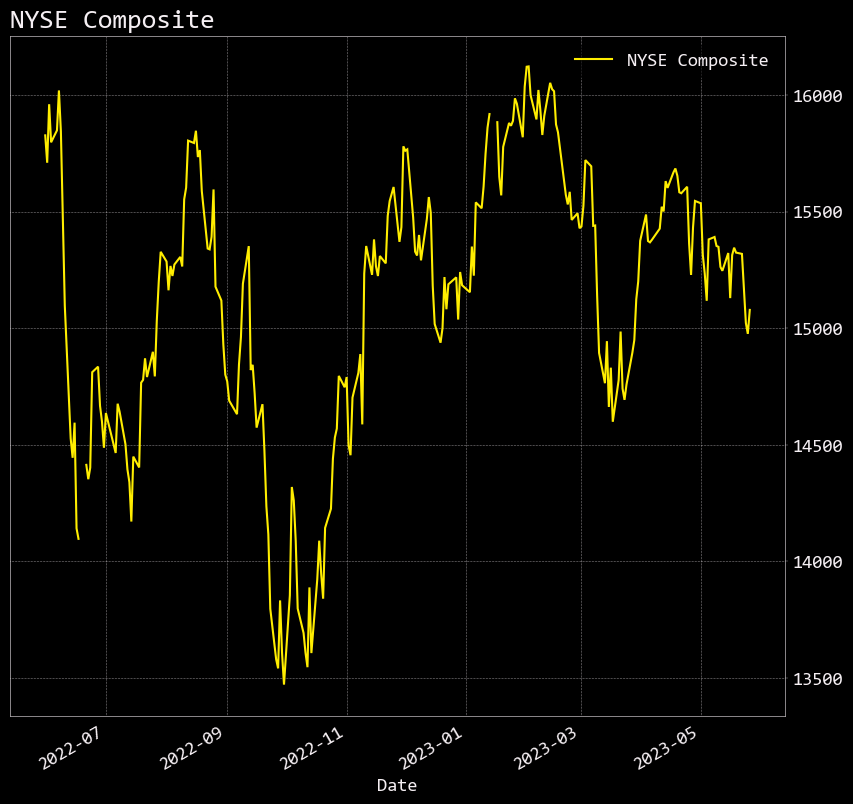

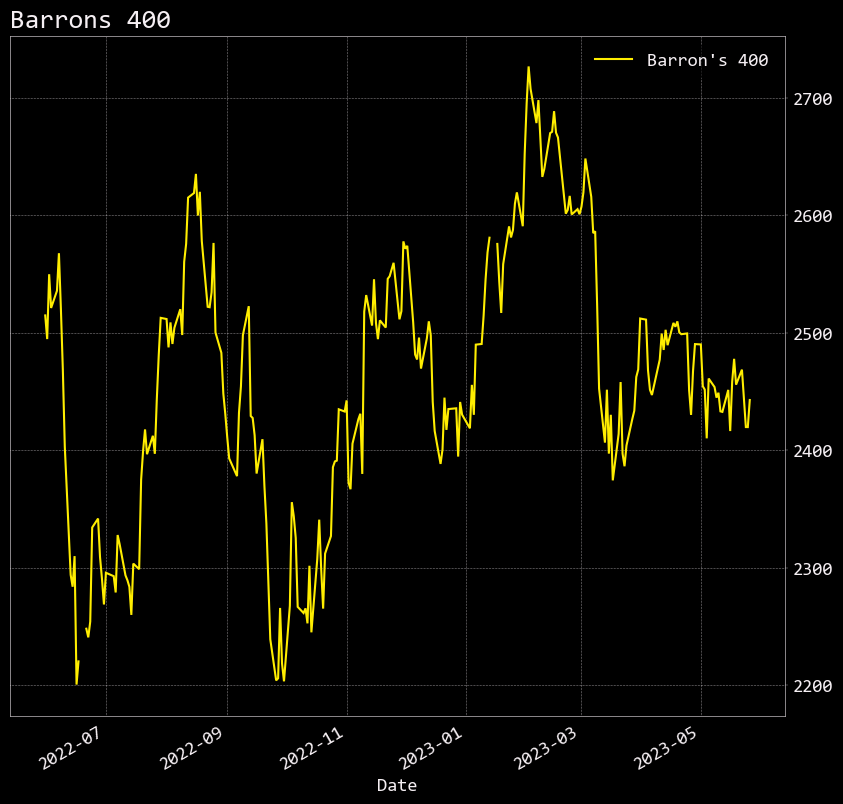

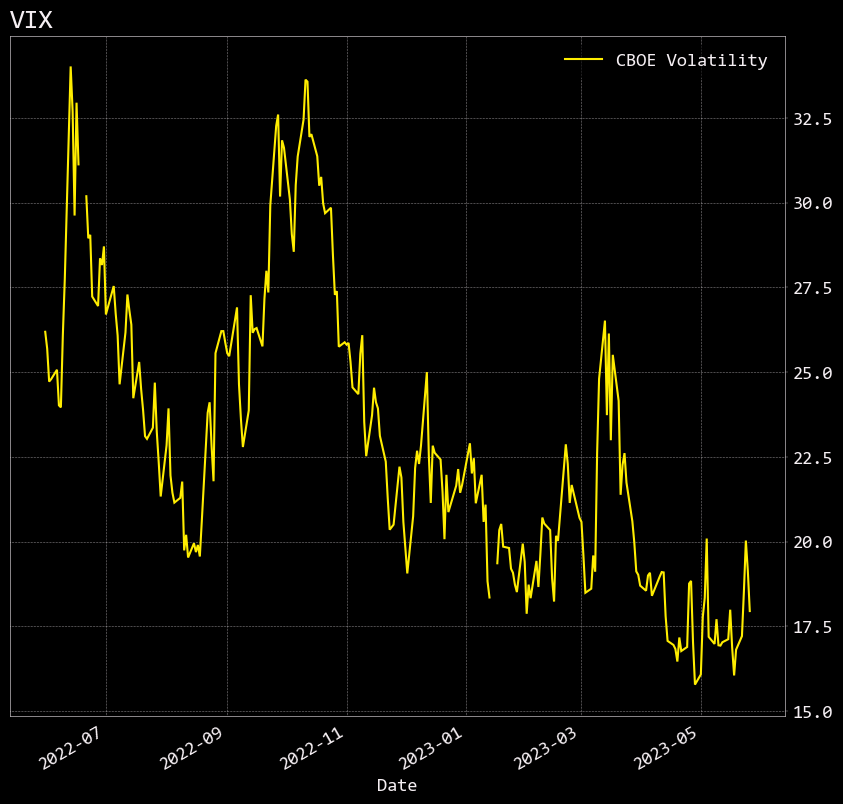

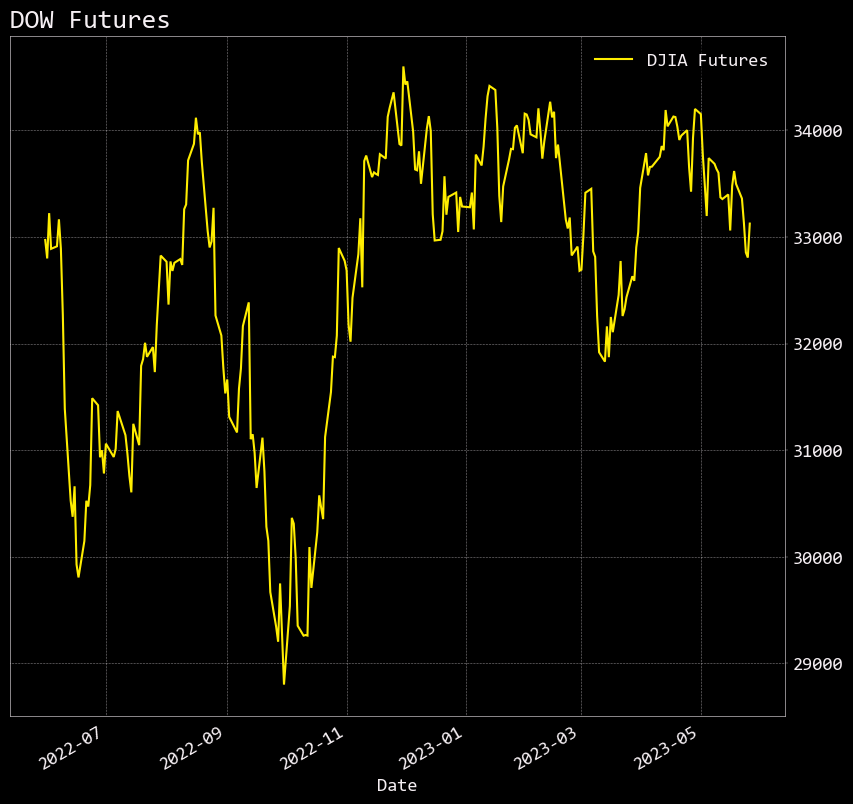

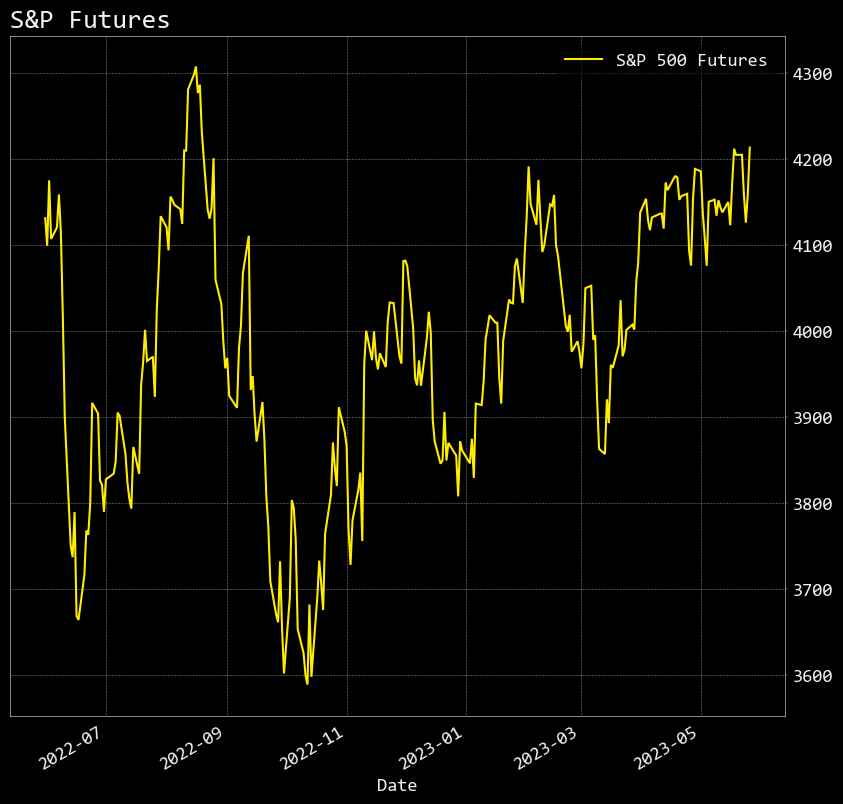

In [26]:
djia = indicies_plot_df.plot(y=["DJIA"], figsize = (10,10), title = "Dow Jones Industrial Average")
nasdaq = indicies_plot_df.plot(y=["Nasdaq Composite"], figsize = (10,10), title = "Nasdaq Composite Index")
sp500 = indicies_plot_df.plot(y=["S&P 500"], figsize = (10,10), title = "S&P 500")
total = indicies_plot_df.plot(y=["DJ Total Stock Market"], figsize = (10,10), title = "DJ Total Stock Market Index")
rut = indicies_plot_df.plot(y=["Russell 2000"], figsize = (10,10), title = "Russell 2000")
nyse = indicies_plot_df.plot(y=["NYSE Composite"], figsize = (10,10), title = "NYSE Composite")
baron = indicies_plot_df.plot(y=["Barron's 400"], figsize = (10,10), title = "Barrons 400")
vix = indicies_plot_df.plot(y=["CBOE Volatility"], figsize = (10,10), title = "VIX")
djifuts = indicies_plot_df.plot(y=["DJIA Futures"], figsize = (10,10), title = "DOW Futures")
spfuts = indicies_plot_df.plot(y=["S&P 500 Futures"], figsize = (10,10), title = "S&P Futures")

<AxesSubplot: title={'left': 'All Indicies'}, xlabel='Date'>

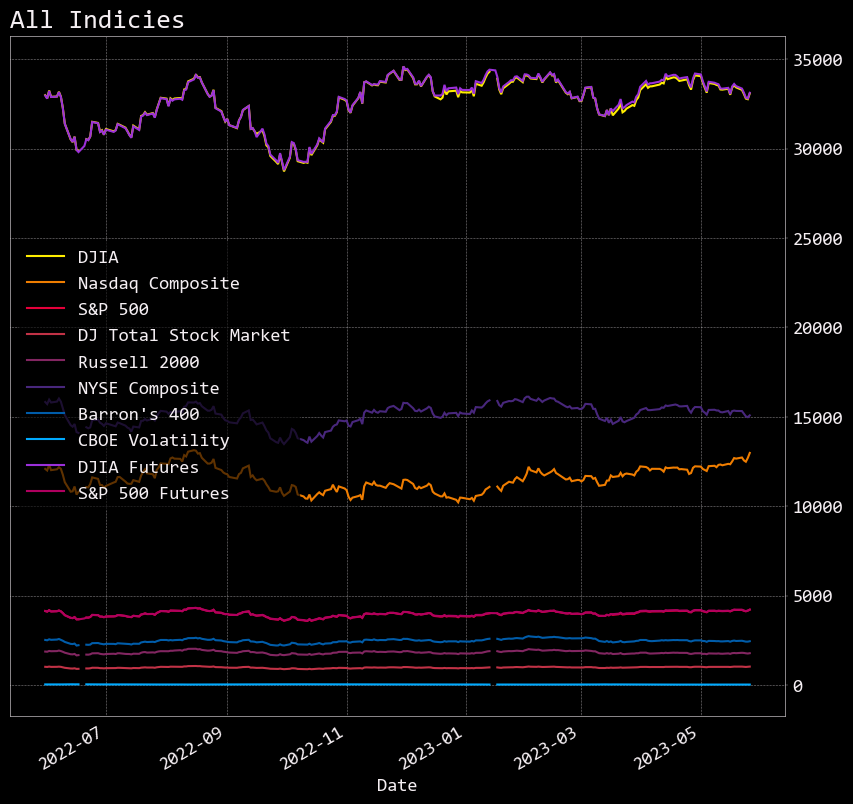

In [25]:
indicies_plot_df.plot(
    title = "All Indicies",
    figsize = (10,10), 
    #logy = True

)

In [ ]:
#How to make plot for drop down??

In [55]:
#openbb.economy.available_indices()

# Commodities

In [79]:
data_commodities = openbb.economy.futures()
data_commodities[["Chg", "%Chg"]] = data_commodities[["Chg", "%Chg"]].apply(pd.to_numeric)
data_commodities = data_commodities.set_index(data_commodities.columns[0])
data_commodities = data_commodities.drop(data_commodities.index[-1])
data_commodities

Price      Chg  %Chg
                                          
Crude Oil             72.54   0.0100  0.01
Brent Crude           76.80  -0.1500 -0.19
Gold                1957.30  -1.1000 -0.06
Silver               23.530   0.0010  0.00
Natural Gas           2.329   0.0000  0.00
Unleaded Gasoline    2.6507   0.0095  0.36
Copper               3.7520  -0.0040 -0.11
Corn                 601.75  -6.2500 -1.03
Wheat                615.75 -12.0000 -1.91

In [80]:
data_commodities.style.applymap(highlight_max)

In [58]:
#openbb.economy.available_indices()

In [66]:
symbols = ["cl", "bz", "gc", "si", "ng", "rb", "hg", "zc", "zw"]

In [72]:
tot_df = openbb.futures.historical(symbols = symbols, start_date = "2022-05-30", end_date = "2023-05-30")
tot_df = tot_df.iloc[:,0:9]
tot_df.columns = ['BZ','CL','GC','HG','NG','RB','SI','ZC','ZW']
tot_df

BZ          CL           GC      HG     NG      RB  \
Date                                                                     
2022-05-31  122.839996  114.669998  1842.699951  4.2950  8.145  4.0804   
2022-06-01  116.290001  115.260002  1843.300049  4.3300  8.696  4.0716   
2022-06-02  117.610001  116.870003  1866.500000  4.5540  8.485  4.1909   
2022-06-03  119.720001  118.870003  1845.400024  4.4775  8.523  4.2522   
2022-06-06  119.510002  118.500000  1839.199951  4.4395  9.322  4.1930   
...                ...         ...          ...     ...    ...     ...   
2023-05-22   75.989998   71.989998  1974.800049  3.6740  2.400  2.6489   
2023-05-23   76.839996   72.910004  1972.400024  3.6415  2.321  2.6622   
2023-05-24   78.360001   74.339996  1962.800049  3.5535  2.398  2.7212   
2023-05-25   76.260002   71.830002  1943.099976  3.5805  2.307  2.6735   
2023-05-26   76.949997   72.669998  1944.099976  3.6735  2.181  2.7034   

                   SI      ZC       ZW  
Date                                    
2022-05-31  21.650999  753.50  1087.50  
2022-06-01  21.884001  731.25  1041.25  
2022-06-02  22.254000  730.25  1058.25  
2022-06-03  21.889999  727.00  1040.00  
2022-06-06  22.073999  742.50  1093.00  
...               ...     ...      ...  
2023-05-22  23.715000  571.00   606.25  
2023-05-23  23.474001  577.50   622.25  
2023-05-24  23.115000  587.25   606.25  
2023-05-25  22.785999  590.75   604.25  
2023-05-26  23.240000  604.00   616.00  

[252 rows x 9 columns]

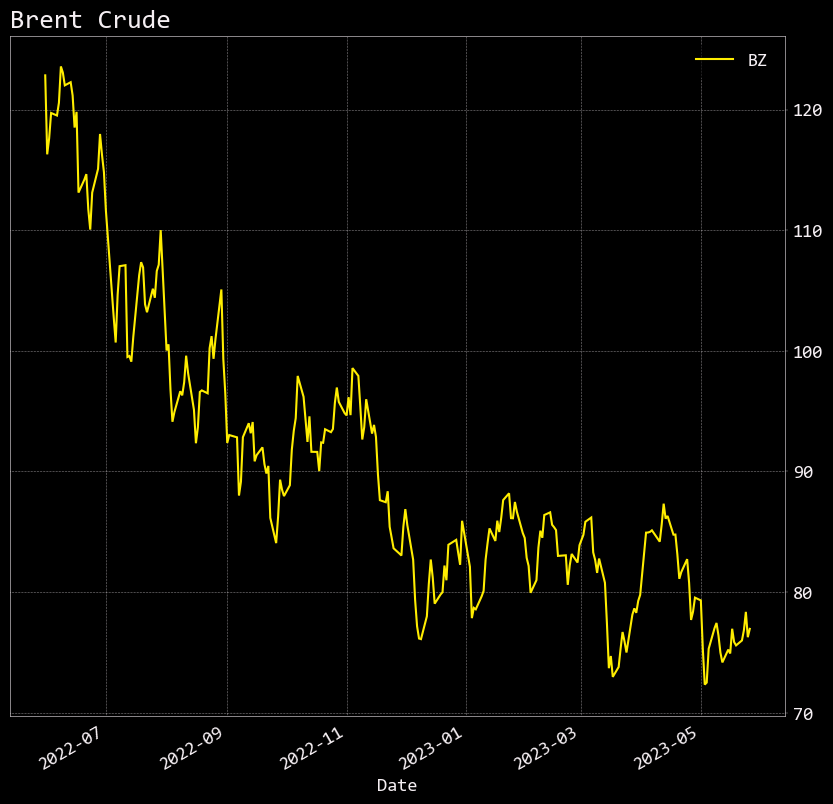

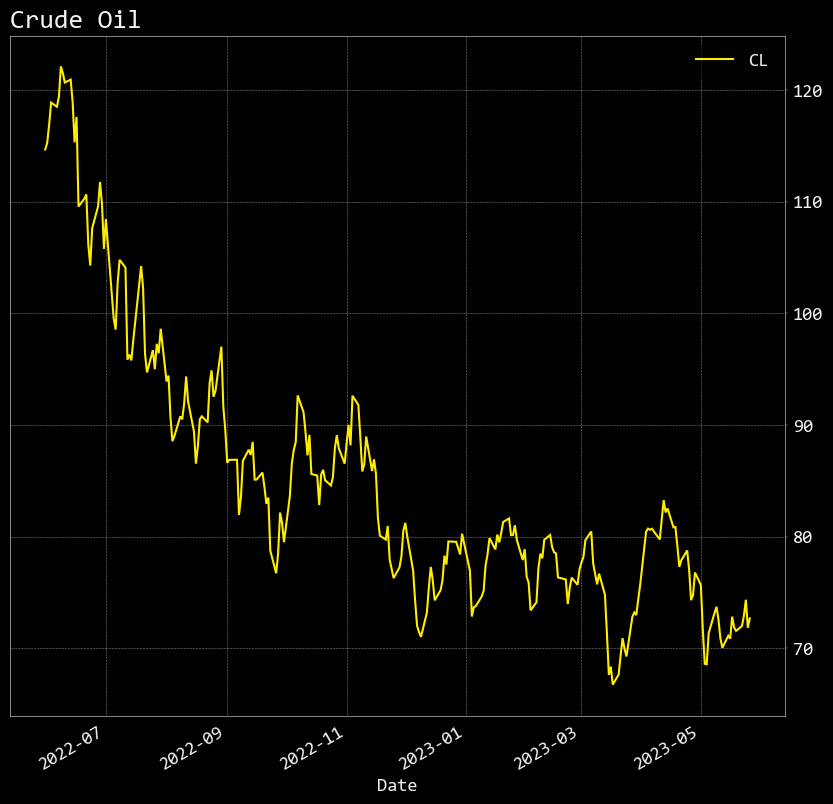

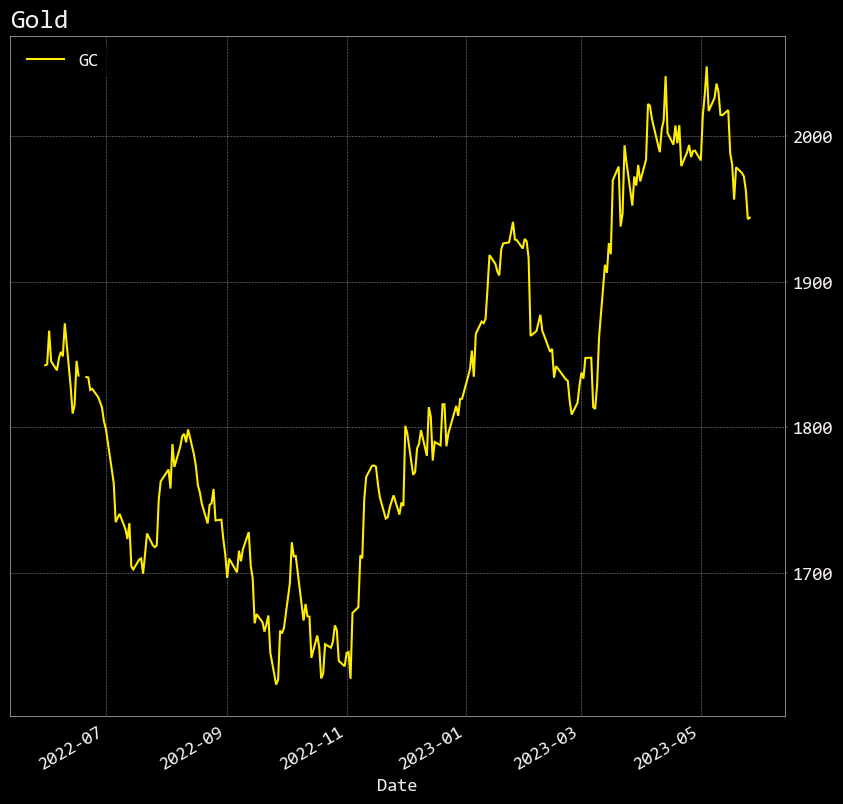

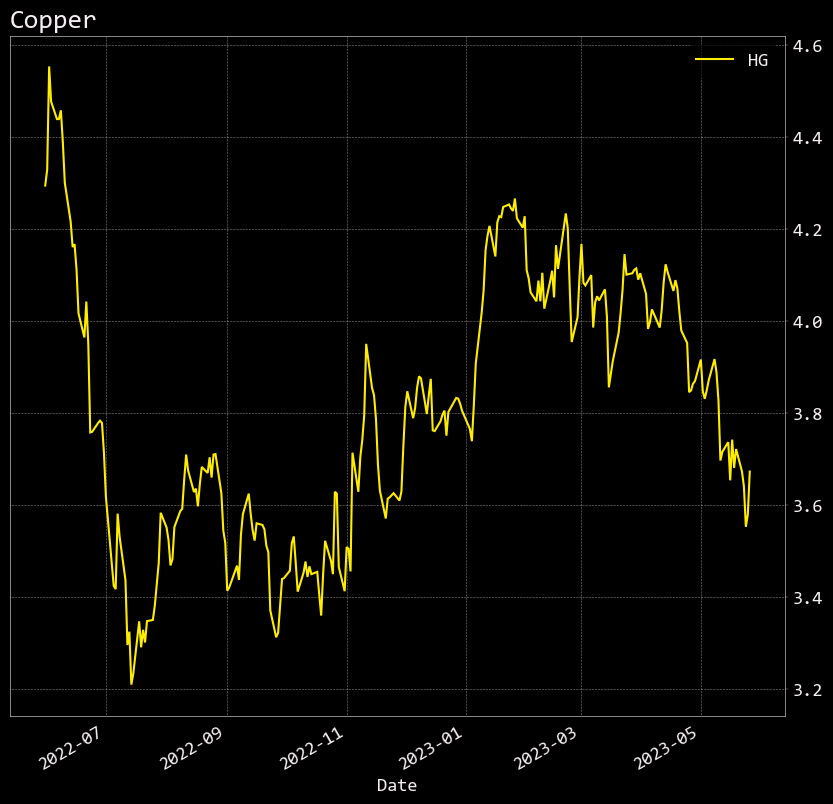

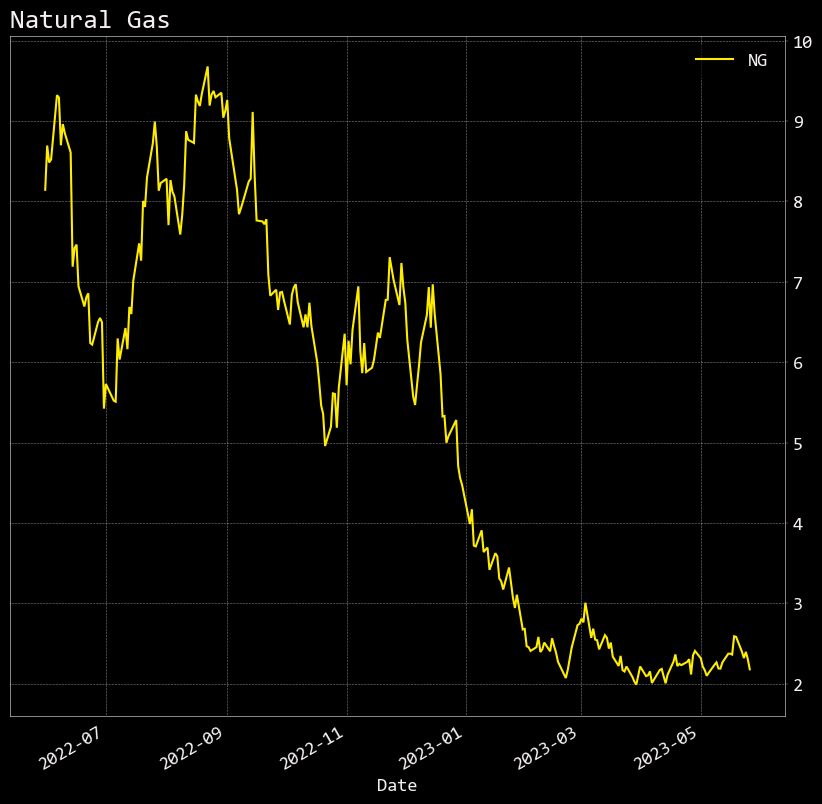

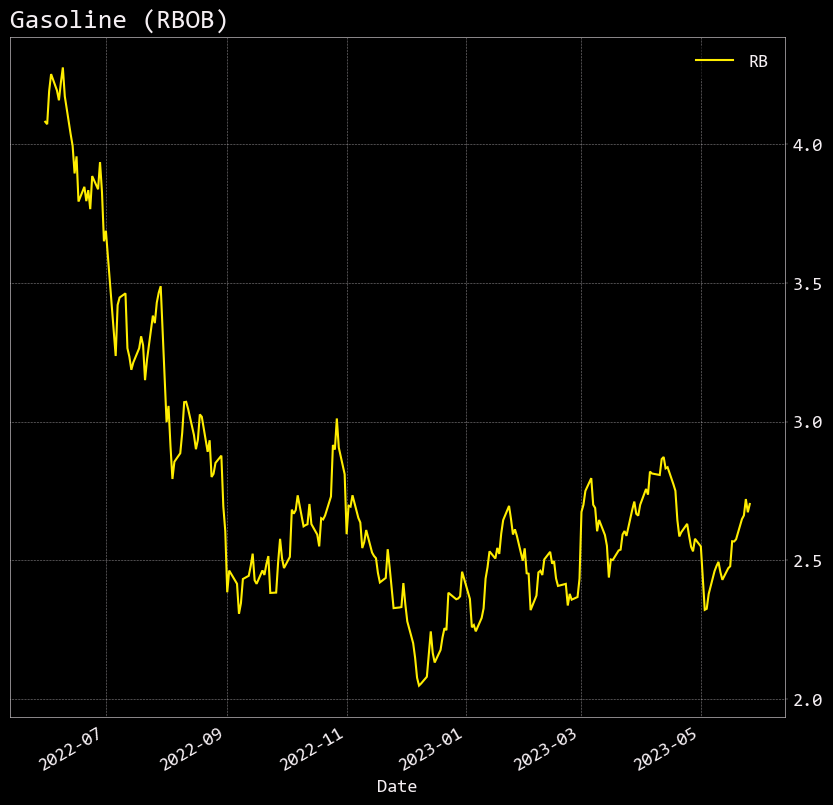

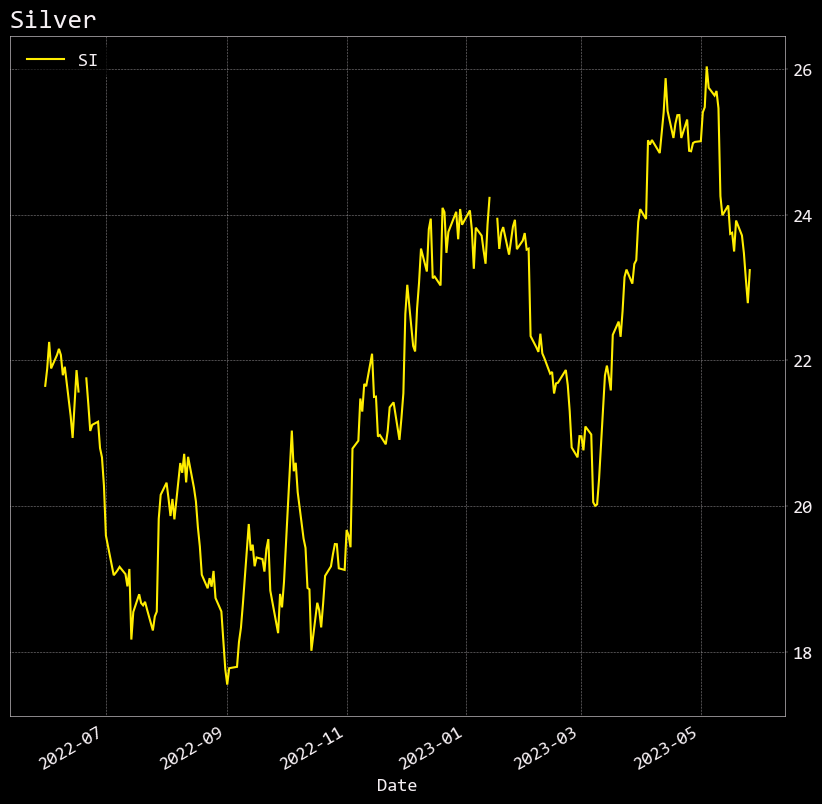

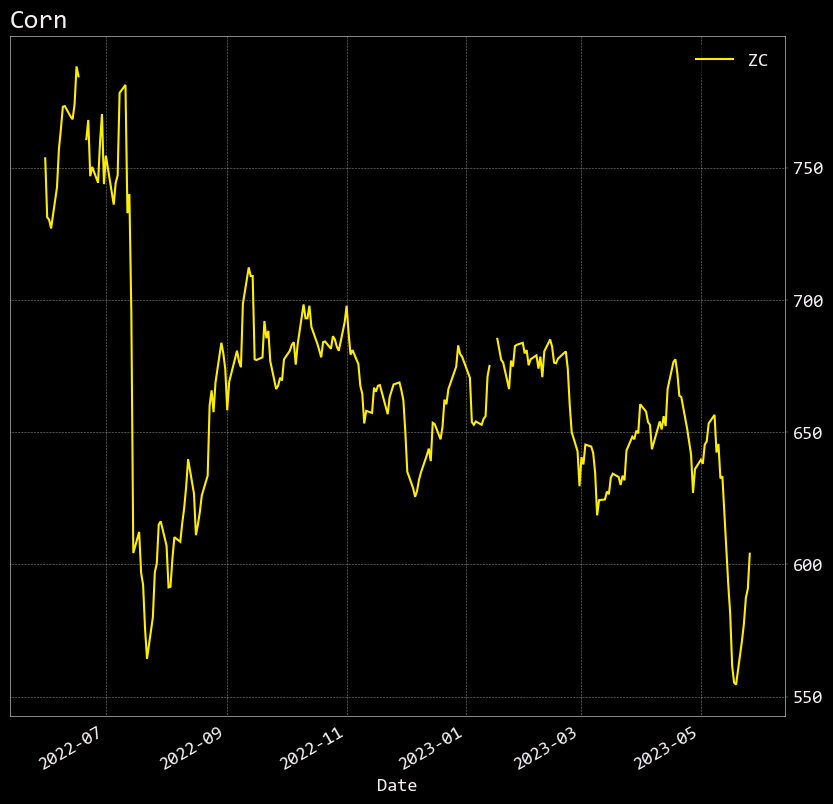

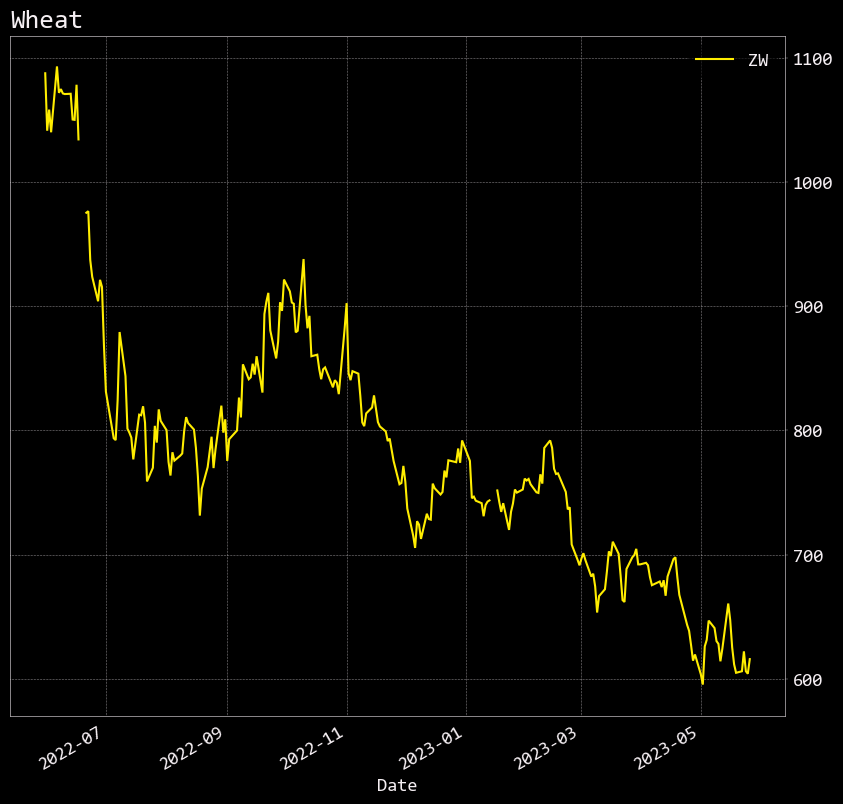

In [74]:
brent = tot_df.plot(y=["BZ"], figsize = (10,10), title = "Brent Crude")
crude = tot_df.plot(y=["CL"], figsize = (10,10), title = "Crude Oil")
gold = tot_df.plot(y=["GC"], figsize = (10,10), title = "Gold")
copper = tot_df.plot(y=["HG"], figsize = (10,10), title = "Copper")
natgas = tot_df.plot(y=["NG"], figsize = (10,10), title = "Natural Gas")
rbob = tot_df.plot(y=["RB"], figsize = (10,10), title = "Gasoline (RBOB)")
silver = tot_df.plot(y=["SI"], figsize = (10,10), title = "Silver")
corn = tot_df.plot(y=["ZC"], figsize = (10,10), title = "Corn")
wheat = tot_df.plot(y=["ZW"], figsize = (10,10), title = "Wheat")

In [95]:
# ML on SEC filings
data = openbb.stocks.fa.analysis("TSLA")
data

Group   Good  \
0              Risk factors   True   
1              Risk factors  False   
2              Risk factors   True   
3              Risk factors  False   
4              Risk factors   True   
5              Risk factors   True   
6              Risk factors   True   
7              Risk factors   True   
8              Risk factors   True   
9              Risk factors   True   
10             Risk factors   True   
11  Discussion and Analysis   True   
12  Discussion and Analysis  False   
13  Discussion and Analysis  False   
14  Discussion and Analysis  False   
15  Discussion and Analysis  False   
16  Discussion and Analysis  False   
17  Discussion and Analysis  False   
18  Discussion and Analysis  False   
19  Discussion and Analysis  False   
20  Discussion and Analysis  False   
21  Discussion and Analysis   True   

                                             Sentence  
0   RISK FACTORS You should carefully consider the...  
1   Under this agreement, we are obligated to, amo...  
2   If we cannot raise additional funds when we ne...  
3   As of December 31, 2022, we and our subsidiari...  
4   We may incur expenses or delays relating to su...  
5   We transact business globally in multiple curr...  
6   A significant and growing number of establishe...  
7   Further, the implementation, maintenance, segr...  
8   Companies across many industries are facing in...  
9   This process may include official review and c...  
10  For example, the General Data Protection Regul...  
11  Our cash flows provided by operating activitie...  
12  There have been no material changes to our cri...  
13  Gross margin for total automotive decreased fr...  
14  Gross margin for total automotive & services a...  
15  R & D expenses as a percentage of revenue decr...  
16  Our effective tax rate decreased from 10% to 9...  
17  See Note 1, Summary of Significant Accounting ...  
18  See Note 7, Debt, to the consolidated financia...  
19  We recognized $288 million in revenue in the f...  
20  The change is primarily due to an increase in ...  
21  Energy Generation and Storage Segment Cost of ...

In [97]:
bal = openbb.stocks.fa.balance("AAPL")
bal

2022-09-30   2021-09-30  \
Breakdown                                                              
Cash and cash equivalents                    23646000.0   34940000.0   
Other short-term investments                 24658000.0   27699000.0   
Total cash                                   48304000.0   62639000.0   
Net receivables                              28184000.0   26278000.0   
Inventory                                     4946000.0    6580000.0   
Other current assets                         21223000.0   14111000.0   
Total current assets                        135405000.0  134836000.0   
Gross property, plant and equipment         114457000.0  109723000.0   
Accumulated depreciation                    -72340000.0  -70283000.0   
Net property, plant and equipment            42117000.0   39440000.0   
Equity and other investments                120805000.0  127877000.0   
Other long-term assets                       54428000.0   48849000.0   
Total non-current assets                    217350000.0  216166000.0   
Total assets                                352755000.0  351002000.0   
Current debt                                 21110000.0   15613000.0   
Accounts payable                             64115000.0   54763000.0   
Deferred revenues                             7912000.0    7612000.0   
Other current liabilities                    60845000.0   47493000.0   
Total current liabilities                   153982000.0  125481000.0   
Long-term debt                               98959000.0  109106000.0   
Other long-term liabilities                  49142000.0   53325000.0   
Total non-current liabilities               148101000.0  162431000.0   
Total liabilities                           302083000.0  287912000.0   
Common stock                                 64849000.0   57365000.0   
Retained earnings                            -3068000.0    5562000.0   
Accumulated other comprehensive income      -11109000.0     163000.0   
Total stockholders' equity                   50672000.0   63090000.0   
Total liabilities and stockholders' equity  352755000.0  351002000.0   

                                             2020-09-30   2019-09-30  
Breakdown                                                             
Cash and cash equivalents                    38016000.0   48844000.0  
Other short-term investments                 52927000.0   51713000.0  
Total cash                                   90943000.0  100557000.0  
Net receivables                              16120000.0   22926000.0  
Inventory                                     4061000.0    4106000.0  
Other current assets                         11264000.0   12352000.0  
Total current assets                        143713000.0  162819000.0  
Gross property, plant and equipment         103526000.0   95957000.0  
Accumulated depreciation                    -66760000.0  -58579000.0  
Net property, plant and equipment            36766000.0   37378000.0  
Equity and other investments                100887000.0  105341000.0  
Other long-term assets                       42522000.0   32978000.0  
Total non-current assets                    180175000.0  175697000.0  
Total assets                                323888000.0  338516000.0  
Current debt                                 13769000.0   16240000.0  
Accounts payable                             42296000.0   46236000.0  
Deferred revenues                             6643000.0    5522000.0  
Other current liabilities                    42684000.0   37720000.0  
Total current liabilities                   105392000.0  105718000.0  
Long-term debt                               98667000.0   91807000.0  
Other long-term liabilities                  54490000.0   50503000.0  
Total non-current liabilities               153157000.0  142310000.0  
Total liabilities                           258549000.0  248028000.0  
Common stock                                 50779000.0   45174000.0  
Retained earnings                     

In [100]:
divs = openbb.stocks.fa.divs("AAPL")
divs

Dividends    Change
Date                                          
2023-05-12 00:00:00-04:00   0.240000  0.010000
2023-02-10 00:00:00-05:00   0.230000  0.000000
2022-11-04 00:00:00-04:00   0.230000  0.000000
2022-08-05 00:00:00-04:00   0.230000  0.000000
2022-05-06 00:00:00-04:00   0.230000  0.010000
...                              ...       ...
1988-05-16 00:00:00-04:00   0.000714  0.000000
1988-02-12 00:00:00-05:00   0.000714  0.000000
1987-11-17 00:00:00-05:00   0.000714  0.000178
1987-08-10 00:00:00-04:00   0.000536  0.000000
1987-05-11 00:00:00-04:00   0.000536       NaN

[79 rows x 2 columns]

In [104]:
earn = openbb.stocks.fa.earnings("AAPL")
earn

Earnings Date EPS Estimate Reported EPS Surprise(%)
0     2024-05-02            -            -           -
1     2024-01-31            -            -           -
3     2023-10-25            -            -           -
4     2023-07-26         1.19            -           -
5     2023-05-04         1.43         1.52      0.0603
6     2023-02-02         1.94         1.88     -0.0288
7     2022-10-27         1.27         1.29      0.0155
8     2022-07-28         1.16          1.2      0.0325
9     2022-04-28         1.43         1.52      0.0644
10    2022-01-27         1.89          2.1      0.1117
11    2021-10-28         1.24         1.24       0.003

In [105]:
#5 yr monthly price
hist5 = openbb.stocks.fa.historical_5("AAPL")
hist5

Open        High         Low       Close      Volume
2018-07-01   43.918066   46.818540   43.822496   45.463867  1574765600
2018-08-01   47.575907   54.681351   47.141073   54.385094  2801275600
2018-09-01   54.762834   55.064927   51.619624   54.122684  2715888000
2018-10-01   54.652540   55.975998   49.411458   52.473152  3158994000
2018-11-01   52.518718   53.312312   40.820984   42.815762  3845305600
2018-12-01   44.379840   44.495324   35.268570   37.951187  3595690000
2019-01-01   37.265486   40.660256   34.164239   40.044338  3312349600
2019-02-01   40.169460   42.313144   39.921646   41.658730  1890162400
2019-03-01   42.110436   47.766882   40.955468   45.896702  2603925600
2019-04-01   46.305037   50.374003   45.517341   48.486912  2024470800
2019-05-01   50.712286   52.024309   42.281985   42.301315  2957826400
2019-06-01   42.592768   48.891937   41.299946   48.006607  2060874800
2019-07-01   49.280027   53.694538   48.125463   51.674049  1895406800
2019-08-01   51.882657   52.884414   46.711372   50.631073  2724326400
2019-09-01   50.261004   55.128116   49.722922   54.531597  2170268400
2019-10-01   54.799415   60.808430   52.379251   60.567387  2433210800
2019-11-01   60.757300   65.251890   60.664781   65.069283  1793326000
2019-12-01   65.269532   71.789895   62.588130   71.711746  2388794800
2020-01-01   72.344259   80.063687   71.491974   75.584908  2934370400
2020-02-01   74.312563   79.909819   62.607664   66.756760  3019279200
2020-03-01   69.098706   74.415497   52.044339   62.247093  6280072400
2020-04-01   60.340189   72.097346   57.990224   71.918648  3265299200
2020-05-01   70.070502   79.369987   69.972588   77.827827  2805936000
2020-06-01   77.991867   91.400824   77.859322   89.540306  3243375600
2020-07-01   89.618856  104.478426   87.522707  104.326248  3020283200
2020-08-01  106.230950  128.616034  105.929051  126.691696  4070061100
2020-09-01  130.578996  135.713242  101.406258  113.907455  3885245100
2020-10-01  115.707409  123.330091  105.950376  107.071648  2894666500
2020-11-01  107.317531  119.985935  105.556937  117.094238  2123077300
2020-12-01  119.227395  136.745468  118.242126  130.735336  2322189600
2021-01-01  131.553084  142.952636  124.518259  130.016068  2240262000
2021-02-01  131.779707  135.848872  116.645977  119.473701  1833855600
2021-03-01  122.109226  127.013331  114.669196  120.530441  2650418200
2021-04-01  122.020397  135.252598  120.865904  129.716980  1889857500
2021-05-01  130.289289  132.292387  120.629100  122.957809  1711934900
2021-06-01  123.631226  135.818411  121.703807  135.373627  1606590000
2021-07-01  135.017794  148.262579  134.187513  144.170532  1919035100
2021-08-01  144.664723  151.712141  142.826266  150.071365  1461542800
2021-09-01  151.286118  155.671359  139.842900  140.070572  1797835100
2021-10-01  140.466524  151.622679  136.873205  148.286728  1565079200
2021-11-01  147.484922  164.026111  145.990166  163.630157  1691029000
2021-12-01  166.030100  180.553282  156.433908  176.032761  2444766700
2022-01-01  176.290474  181.356236  153.360713  173.266876  2108446000
2022-02-01  172.503542  175.120686  150.684094  163.690506  1627516300
2022-03-01  163.482167  178.281922  148.990132  173.318893  2180800100
2022-04-01  172.743170  177.170198  154.231079  156.484283  1687795600
2022-05-01  155.551275  165.249023  131.629467  147.739456  2401040300
2022-06-01  149.010222  150.839311  128.274041  135.908463  1749099800
2022-07-01  135.232484  162.658727  134.854750  161.545364  1447125400
2022-08-01  160.054270  175.104402  156.207247  156.286774  1510239600
2022-09-01  155.926486  163.511772  137.371394  137.570480  2084722800
2022-10-01  137.580453  156.782580  133.757933  152.641525  1868139700
2022-11-01  154.373619  154.741929  133.767909  147.355728  1724847700
2022-12-01  147.779654  150.481777  125.504518  129.552719  1675731200
2023-01-01  129.901704  146.802483  123.809445  143.871017  1443652500
2023-02-01  143.551965  156.923031  140.90

In [106]:
overview = openbb.stocks.fa.overview("AAPL")
overview

Value
Currency                                    USD
Day high                                179.190
Day low                                 177.460
Exchange                                    NMS
Fifty day average                       169.538
Last price                              179.090
Last volume                            14.176 M
Market cap                              2.817 T
Open                                    177.895
Previous close                          177.950
Quote type                               EQUITY
Regular market previous close           177.820
Shares                                 15.729 B
Ten day average volume                 69.116 M
Three month average volume             59.726 M
Timezone                       America/New_York
Two hundred day average                 152.547
Year change                               0.247
Year high                               184.950
Year low                                124.170

In [107]:
#price targets
pt = openbb.stocks.fa.pt("AAPL")
pt

Company Rating  Price Target
Date                                                           
2021-10-29                Barclays Capital   HOLD         145.0
2021-12-02  Wedbush Morgan Securities Inc.    BUY         200.0
2021-12-07                  Morgan Stanley    BUY         200.0
2021-12-13                     J.P. Morgan    BUY         210.0
2021-12-14                        Evercore    BUY         200.0
...                                    ...    ...           ...
2023-06-05   Bank of America Merrill Lynch   HOLD         190.0
2023-06-06                   Credit Suisse    BUY         200.0
2023-06-06                Wells Fargo & Co    BUY         210.0
2023-06-06          Needham & Company, LLC    BUY         195.0
2023-06-06             D.A. Davidson & Co.   HOLD         185.0

[100 rows x 3 columns]

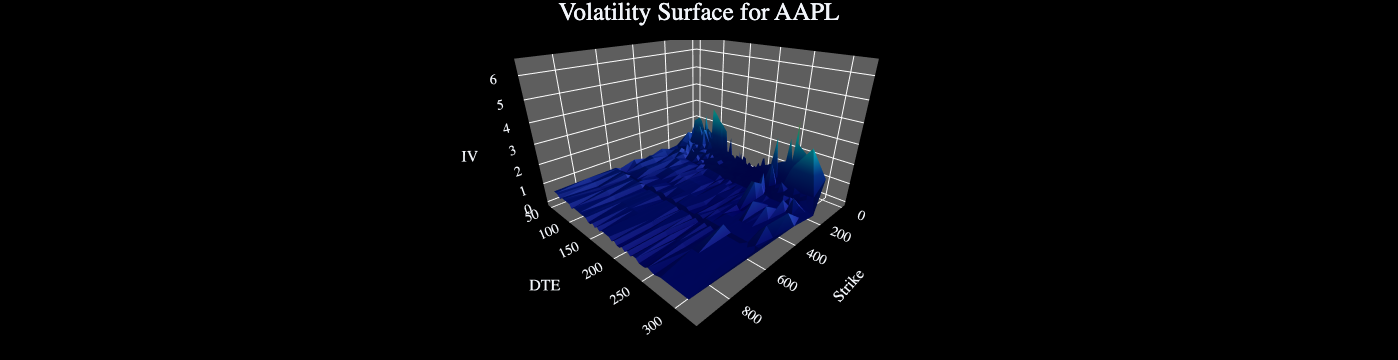

In [109]:
volsurf = openbb.stocks.options.vsurf_chart("AAPL")
volsurf